In [1]:
import json
with open('Gas riser 1.json', "r") as json_file:
    f=json_file.read()
    data = json.loads(f)
len(data)

15

In [2]:
#level 1
for i in data:
    print(i)

@class
id
name
properties
type
children
template
path
asset
connections
connectionPoints
adjustable
status
creationInfo
scopeOfWorkRelationships


In [4]:
# interested in elements, lets print their names
for index, i in enumerate(data["properties"]):
    print(index, i["name"])


0 nomOd
1 packOn
2 od
3 color
4 material
5 weight
6 id
7 wallThickness
8 density
9 description
10 points


In [5]:
# and if we want to get the points property
data["properties"][10]

{'id': 'dc23bbc9-ca1c-445d-aa7f-c750413fd635',
 'name': 'points',
 'label': 'Points (x,y,z) (m)',
 'value': [{'x': 200286.88, 'y': 650287.8, 'z': 4.0},
  {'x': 200328.53, 'y': 650206.75, 'z': -1303.0522},
  {'x': 200419.72, 'y': 650029.3, 'z': -1489.101},
  {'x': 200458.33, 'y': 649954.2, 'z': -1489.101},
  {'x': 200460.9, 'y': 649949.2, 'z': -1486.7578},
  {'x': 200463.08, 'y': 649944.94, 'z': -1481.9911},
  {'x': 200464.02, 'y': 649943.1, 'z': -1480.4231},
  {'x': 200465.14, 'y': 649940.94, 'z': -1479.5883},
  {'x': 200466.31, 'y': 649938.7, 'z': -1479.5735},
  {'x': 200467.44, 'y': 649936.5, 'z': -1480.3801},
  {'x': 200468.38, 'y': 649934.6, 'z': -1481.9244},
  {'x': 200469.05, 'y': 649933.3, 'z': -1484.0459},
  {'x': 200469.38, 'y': 649932.7, 'z': -1486.5239},
  {'x': 200469.36, 'y': 649932.8, 'z': -1487.648}],
 'valueType': 'vectorArray',
 'formula': None,
 'type': 'Engineering'}

In [6]:
# but we want the list of points only then
line_points = [(p["x"], p["y"], p["z"])for p in data["properties"][10]["value"]]
line_points

[(200286.88, 650287.8, 4.0),
 (200328.53, 650206.75, -1303.0522),
 (200419.72, 650029.3, -1489.101),
 (200458.33, 649954.2, -1489.101),
 (200460.9, 649949.2, -1486.7578),
 (200463.08, 649944.94, -1481.9911),
 (200464.02, 649943.1, -1480.4231),
 (200465.14, 649940.94, -1479.5883),
 (200466.31, 649938.7, -1479.5735),
 (200467.44, 649936.5, -1480.3801),
 (200468.38, 649934.6, -1481.9244),
 (200469.05, 649933.3, -1484.0459),
 (200469.38, 649932.7, -1486.5239),
 (200469.36, 649932.8, -1487.648)]

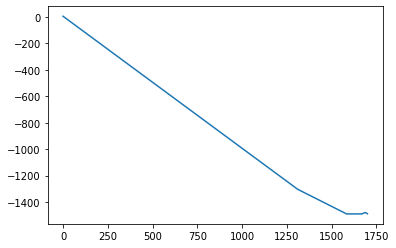

In [8]:
# example to calculate line length and plot the alignment sheet (Length - Z plot)
from matplotlib import pyplot as plt
import math
_cumkp=0
kp=[]
for index, point in enumerate(line_points):
    if index == 0: 
        kp.append(0)  
        continue
    _kp = math.sqrt( (line_points[index][0]-line_points[index-1][0])**2 + 
                   (line_points[index][1]-line_points[index-1][1])**2 + 
                   (line_points[index][2]-line_points[index-1][2])**2 )
    _cumkp = _cumkp + _kp 
    kp.append(_cumkp)
plt.plot(kp,[p[2] for p in line_points])